<a href="https://colab.research.google.com/github/FarnazNK/-Analysis-of-Current-Employee-Names-Salaries-and-Position-Titles-in-Chicago-/blob/main/Framingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('framingham.csv')
df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.isna().sum()
# Calculate the percentage of missing values for each column
missing_data  = df.isnull().sum() * 100 / len(df)
missing_data = missing_data.round(2).astype(str) + '%'

# Print or return the missing data percentage
print(missing_data )


male                0.0%
age                 0.0%
education          2.48%
currentSmoker       0.0%
cigsPerDay         0.68%
BPMeds             1.25%
prevalentStroke     0.0%
prevalentHyp        0.0%
diabetes            0.0%
totChol            1.18%
sysBP               0.0%
diaBP               0.0%
BMI                0.45%
heartRate          0.02%
glucose            9.15%
TenYearCHD          0.0%
dtype: object


In [5]:
unique_values = df.nunique()

print(unique_values)

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64


TenYearCHD

It is a binary column, where 0 represents "will not develop CHD in ten years" and 1 represents "will develop CHD in ten years

In [6]:
unique_value_percentages = df['TenYearCHD'].value_counts(normalize=True) * 100

print(unique_value_percentages)

0    84.811321
1    15.188679
Name: TenYearCHD, dtype: float64


The target column is unbalanced

In [7]:
# Check for skewness
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
non_binary_numerical_columns = [column for column in numerical_columns if df[column].nunique() > 2]

columns_to_check = non_binary_numerical_columns
# Calculate skewness for each column
skewness = df[columns_to_check].skew()

# Print the skewness values
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
age           0.228867
education     0.688730
cigsPerDay    1.247052
totChol       0.871881
sysBP         1.145285
diaBP         0.713250
BMI           0.982183
heartRate     0.644372
glucose       6.214948
dtype: float64


**age**: 0.228867 (Slightly positively skewed)

**education**: 0.688730 (Positively skewed)

**cigsPerDay**: 1.247052 (Positively skewed)

**totChol**: 0.871881 (Positively skewed)

**sysBP**: 1.145285 (Positively skewed)

**diaBP**: 0.713250 (Positively skewed)

**BMI**: 0.982183 (Positively skewed)

**heartRate**: 0.644372 (Positively skewed)

**glucose**: 6.214948 (Strongly positively skewed)

Handling the missing value

In [8]:
# Impute numerical columns with mean or median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['education'].fillna(df['heartRate'].median(), inplace=True)
df['BPMeds'].fillna(df['heartRate'].median(), inplace=True)


# For 'glucose' with higher missing percentage, consider more advanced imputation
# For example, using K-nearest neighbors imputation:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['glucose'] = imputer.fit_transform(df[['glucose']])

# Check if all missing values are filled
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64


In [9]:
binary_numerical_columns = [column for column in numerical_columns if df[column].nunique() < 3 and column != "TenYearCHD"]


for col in binary_numerical_columns:
    for unique_value in df[col].unique():
        if unique_value is not None:  # Exclude None values from the analysis
            prob = round(df[df[col] == unique_value]["TenYearCHD"].mean() * 100, 2)
            print(f'A person with {col} equal to {unique_value} has a probability of {prob}% to get a TenYearCHD')
    print()  # Print a newline to separate the output for different columns


A person with male equal to 1 has a probability of 18.85% to get a TenYearCHD
A person with male equal to 0 has a probability of 12.44% to get a TenYearCHD

A person with currentSmoker equal to 0 has a probability of 14.5% to get a TenYearCHD
A person with currentSmoker equal to 1 has a probability of 15.89% to get a TenYearCHD

A person with prevalentStroke equal to 0 has a probability of 15.02% to get a TenYearCHD
A person with prevalentStroke equal to 1 has a probability of 44.0% to get a TenYearCHD

A person with prevalentHyp equal to 0 has a probability of 10.91% to get a TenYearCHD
A person with prevalentHyp equal to 1 has a probability of 24.68% to get a TenYearCHD

A person with diabetes equal to 0 has a probability of 14.62% to get a TenYearCHD
A person with diabetes equal to 1 has a probability of 36.7% to get a TenYearCHD



In [10]:
from sklearn.metrics import mutual_info_score

def cat_mut_inf(series):
    return mutual_info_score(series, df['TenYearCHD'])

df_binary = df[binary_numerical_columns].apply(cat_mut_inf)
df_binary = df_binary.sort_values(ascending=False).to_frame(name='mutual_info_score')
df_binary

,mutual_info_score
prevalentHyp,0.014776
male,0.003866
diabetes,0.003685
prevalentStroke,0.001400
currentSmoker,0.000189


all of the predictor variables (male, diabetes, prevalentStroke, and currentSmoker) have relatively low mutual information scores with the target variable (TenYearCHD). This suggests that there may not be strong statistical dependencies or relationships between these variables and the likelihood of developing coronary heart disease (CHD) in the next ten years

In [11]:
non_binary_numerical_columns = [col for col in numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df[non_binary_numerical_columns].corr()

# Get the correlation values for the target variable (replace 'target_variable' with the name of your target column)
target_correlations = correlation_matrix['TenYearCHD']

# Print the correlations between the target variable and all other variables
print(target_correlations)

male               0.088374
age                0.225408
education         -0.004517
currentSmoker      0.019448
cigsPerDay         0.058729
BPMeds             0.019200
prevalentStroke    0.061823
prevalentHyp       0.177458
diabetes           0.097344
totChol            0.081807
sysBP              0.216374
diaBP              0.145112
BMI                0.074788
heartRate          0.022851
glucose            0.120451
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


In [12]:
# Define the list of numerical columns (excluding 'id' and 'stroke')
selected_columns = [col for col in numerical_columns if col not in ['TenYearCHD']]

# Calculate the mean values of the selected columns, grouped by the 'stroke' column
mean_values_by_group = df.groupby('TenYearCHD')[selected_columns].mean()

# Display the result
print(mean_values_by_group)

                male        age  education  currentSmoker  cigsPerDay  \
TenYearCHD                                                              
0           0.410734  48.762514   3.809511       0.489989    8.648498   
1           0.532609  54.145963   3.666149       0.517081   10.596273   

              BPMeds  prevalentStroke  prevalentHyp  diabetes     totChol  \
TenYearCHD                                                                  
0           0.899055         0.003893      0.275862  0.019188  235.165095   
1           1.344720         0.017081      0.504658  0.062112  245.267540   

                 sysBP      diaBP        BMI  heartRate    glucose  
TenYearCHD                                                          
0           130.337319  82.166435  25.671982  75.762514  80.799976  
1           143.618789  86.981366  26.520106  76.527950  88.461464  


In [13]:
df = df.drop(columns=['education'])


The analysis was conducted to compare the average values of various features between two groups of individuals: those who developed coronary heart disease (CHD) in the next ten years (TenYearCHD = 1) and those who did not (TenYearCHD = 0). The following findings were observed:

For individuals who did not develop CHD (TenYearCHD = 0):

Male: 41.07%

Age: 48.76 years

Education: 3.81 years

Current Smoker: 48.99%

Average Cigarettes Per Day: 8.65

Taking Blood Pressure Medication (BPMeds): 0.90%

Prevalent Stroke: 0.39%

Prevalent Hypertension (prevalentHyp): 27.59%

Diabetes: 1.92%

Total Cholesterol (totChol): 235.17 mg/dL

Systolic Blood Pressure (sysBP): 130.34 mm Hg

Diastolic Blood Pressure (diaBP): 82.17 mm Hg

Body Mass Index (BMI): 25.67

Heart Rate: 75.76 beats per minute

Glucose Level: 80.80 mg/dL


For individuals who did develop CHD (TenYearCHD = 1):

Male: 53.26%

Age: 54.15 years

Education: 3.67 years

Current Smoker: 51.71%

Average Cigarettes Per Day: 10.60

Taking Blood Pressure Medication (BPMeds): 1.34%

Prevalent Stroke: 1.71%

Prevalent Hypertension (prevalentHyp): 50.47%

Diabetes: 6.21%

Total Cholesterol (totChol): 245.27 mg/dL
Systolic Blood Pressure (sysBP): 143.62 mm Hg
Diastolic Blood Pressure (diaBP): 86.98 mm Hg
Body Mass Index (BMI): 26.52
Heart Rate: 76.53 beats per minute
Glucose Level: 88.46 mg/dL


                     male       age  currentSmoker  cigsPerDay    BPMeds  \
male             1.000000 -0.029014       0.197026    0.314849 -0.034287   
age             -0.029014  1.000000      -0.213662   -0.192017  0.053782   
currentSmoker    0.197026 -0.213662       1.000000    0.760326 -0.014514   
cigsPerDay       0.314849 -0.192017       0.760326    1.000000 -0.008226   
BPMeds          -0.034287  0.053782      -0.014514   -0.008226  1.000000   
prevalentStroke -0.004550  0.057679      -0.032980   -0.032248  0.021384   
prevalentHyp     0.005853  0.306799      -0.103710   -0.065541  0.030637   
diabetes         0.015693  0.101314      -0.044285   -0.036173  0.009592   
totChol         -0.070064  0.260691      -0.046211   -0.026975  0.010964   
sysBP           -0.035879  0.394053      -0.130281   -0.088393  0.030453   
diaBP            0.058199  0.205586      -0.107933   -0.056768  0.008866   
BMI              0.081705  0.135578      -0.167483   -0.092768 -0.003823   
heartRate   

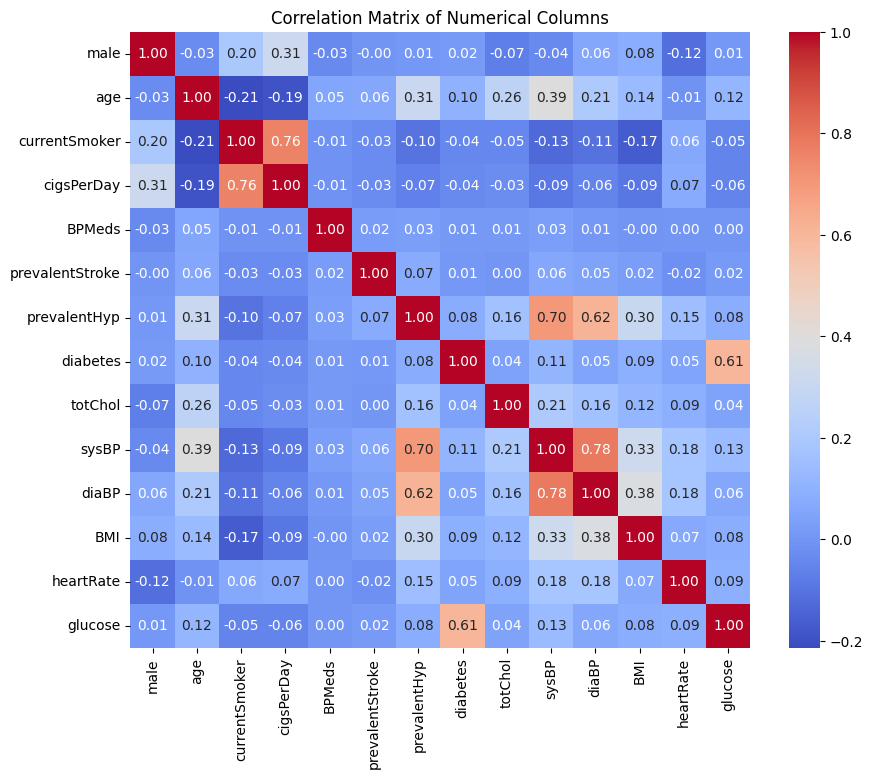

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of numerical columns excluding 'id' and 'stroke'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
selected_columns = [col for col in numerical_columns if col not in ['TenYearCHD']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


There is a **moderate positive correlation** (around 0.76) between 'currentSmoker' and 'cigsPerDay,' which is expected because people who smoke more tend to smoke more cigarettes per day.

'sysBP' and 'diaBP' have a **strong positive correlation **(around 0.78). This is not surprising since systolic blood pressure ('sysBP') and diastolic blood pressure ('diaBP') are typically related.

There is a **moderate positive correlation** (around 0.61) between 'prevalentHyp' (prevalent hypertension) and 'diaBP,' which is expected since prevalent hypertension can be associated with higher diastolic blood pressure.

'diabetes' has a **moderate positive correlation** (around 0.61) with 'glucose,' which is expected since diabetes is related to high blood glucose levels.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF analysis (excluding the target variable)
vif_data = df
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display the VIF values
print(vif)


           Features         VIF
0              male    2.088880
1               age   41.451669
2     currentSmoker    4.735856
3        cigsPerDay    4.038548
4            BPMeds    1.018778
5   prevalentStroke    1.017018
6      prevalentHyp    2.318526
7          diabetes    1.561292
8           totChol   31.205442
9             sysBP  137.137254
10            diaBP  133.387456
11              BMI   45.106940
12        heartRate   38.574563
13          glucose   20.941268
14       TenYearCHD    1.285515


**age, totChol, sysBP, diaBP, BMI, heartRate, and glucose** all have relatively high VIF values, suggesting strong multicollinearity among these features.

A VIF of 41.45 for age indicates that its variance is inflated by a factor of 41.45 due to multicollinearity.

Similarly, **sysBP and diaBP** have VIF values of over 130, indicating very high multicollinearity.

On the other hand, features like BPMeds, prevalentStroke, diabetes, and have low VIF values, indicating less multicollinearity with other features.

##Model Selection

We will go step by step. We will load the data Then first we decide our evaluation method Then we will make baseline algorithm to give us lower limit Then we define our models We make our pipeline Analyze the models by evaluation results and boxplot. Decide which model perform the best in the evaluated models. We try to improve oour models.

In [19]:
y= df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)

# Define your column names here
categorical = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [20]:
def evaluate_model(X, y, model):
    from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

In [21]:
#Baseline Model

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score



def baseline_model(X, y, model):
    transformer = ColumnTransformer(transformers=[
        ('imp', SimpleImputer(strategy='median'), numerical_columns),
        ('o', OneHotEncoder(), categorical)
    ])
    pipeline = Pipeline(steps=[
        ('t', transformer),
        ('p', PowerTransformer(method='yeo-johnson')),
        ('m', model)
    ])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

# Using the DummyClassifier as your model
model = DummyClassifier(strategy='constant', constant=1)
scores = baseline_model(X, y, model)
print('Mean roc_auc: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean roc_auc: 0.500 (0.000)


Any model gets better score than baseline has skill on our problem.

Any model gets lower score than baseline model, does not have skill on our problem.

In this study, our baseline model gives us (Mean roc_auc: 0.500 (0.000)).

##Models

In [23]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


def get_models():
    models, names = list(), list()

    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')

    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')

    models.append(SVC(gamma='scale'))
    names.append('SVM')

    models.append(RandomForestClassifier(random_state=42))
    names.append('Random Forest')

    models.append(GradientBoostingClassifier(random_state=42))
    names.append('Gradient Boosting')

    models.append(AdaBoostClassifier(random_state=42))
    names.append('AdaBoost')

    models.append(ExtraTreesClassifier(random_state=42))
    names.append('Extra Trees')

    models.append(CatBoostClassifier(verbose=0, random_state=42))
    names.append('CatBoost')

    models.append(LGBMClassifier(random_state=42))
    names.append('LightGBM')

    models.append(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    names.append('XGBoost')

    models.append(KNeighborsClassifier())
    names.append('KNN')

    models.append(GaussianNB())
    names.append('Gaussian Naive Bayes')

    models.append(DecisionTreeClassifier(random_state=42))
    names.append('Decision Tree')

    models.append(Perceptron(random_state=42))
    names.append('Perceptron')

    models.append(MLPClassifier(random_state=42, max_iter=1000))
    names.append('MLP Neural Network')

    return models, names

In [ ]:
models, names = get_models()
results = []

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[
        ('imp', SimpleImputer(strategy='median'), numerical_columns),
        ('o', OneHotEncoder(), categorical)
    ])
    pipeline = Pipeline(steps=[
        ('t', transformer),
        ('p', PowerTransformer(method='yeo-johnson')),
        ('m', models[i])
    ])
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print(f'Model {names[i]} - Mean ROC AUC: {scores.mean():.3f} (STD: {scores.std():.3f})')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model LR - Mean ROC AUC: 0.725 (STD: 0.029)
Model LDA - Mean ROC AUC: 0.724 (STD: 0.028)
Model SVM - Mean ROC AUC: 0.616 (STD: 0.035)
Model Random Forest - Mean ROC AUC: 0.695 (STD: 0.026)
Model Gradient Boosting - Mean ROC AUC: 0.700 (STD: 0.031)
Model AdaBoost - Mean ROC AUC: 0.695 (STD: 0.039)
Model Extra Trees - Mean ROC AUC: 0.693 (STD: 0.033)
Model CatBoost - Mean ROC AUC: 0.690 (STD: 0.036)
Model LightGBM - Mean ROC AUC: 0.671 (STD: 0.035)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model XGBoost - Mean ROC AUC: 0.647 (STD: 0.039)
Model KNN - Mean ROC AUC: 0.625 (STD: 0.033)
Model Gaussian Naive Bayes - Mean ROC AUC: 0.704 (STD: 0.027)
Model Decision Tree - Mean ROC AUC: 0.557 (STD: 0.028)
Model Perceptron - Mean ROC AUC: 0.562 (STD: 0.080)
Model MLP Neural Network - Mean ROC AUC: 0.676 (STD: 0.044)


#Second Model with SMOTE (Synthetic Minority Over-sampling Technique)

In [70]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

models, names = get_models()

results = []

for i in range(len(models)):
    # Define the pipeline with SMOTE
    transformer = ColumnTransformer(transformers=[
        ('imp', SimpleImputer(strategy='median'), numerical_columns),
        ('o', OneHotEncoder(), categorical)
    ])

    pipeline = Pipeline(steps=[
        ('t', transformer),
        ('s', SMOTE(random_state=42)),
        ('p', PowerTransformer(method='yeo-johnson')),
        ('m', models[i])
    ])

    # Evaluate the model
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    # Print the performance metrics
    print(f'Model {names[i]} - Mean ROC AUC: {scores.mean():.3f} (STD: {scores.std():.3f})')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model LR - Mean ROC AUC: 0.717 (STD: 0.036)
Model LDA - Mean ROC AUC: 0.712 (STD: 0.039)
Model SVM - Mean ROC AUC: 0.662 (STD: 0.039)
Model Random Forest - Mean ROC AUC: 0.680 (STD: 0.039)
Model Gradient Boosting - Mean ROC AUC: 0.695 (STD: 0.030)
Model AdaBoost - Mean ROC AUC: 0.700 (STD: 0.032)
Model Extra Trees - Mean ROC AUC: 0.669 (STD: 0.043)
Model CatBoost - Mean ROC AUC: 0.666 (STD: 0.034)
Model LightGBM - Mean ROC AUC: 0.667 (STD: 0.035)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model XGBoost - Mean ROC AUC: 0.638 (STD: 0.037)
Model KNN - Mean ROC AUC: 0.615 (STD: 0.036)
Model Gaussian Naive Bayes - Mean ROC AUC: 0.691 (STD: 0.030)
Model Decision Tree - Mean ROC AUC: 0.562 (STD: 0.027)
Model Perceptron - Mean ROC AUC: 0.606 (STD: 0.055)
Model MLP Neural Network - Mean ROC AUC: 0.601 (STD: 0.042)


**Ensemble Models**:

Logistic Regression (LR) - Mean ROC AUC: 0.717 (STD: 0.036)

Linear Discriminant Analysis (LDA) - Mean ROC AUC: 0.712 (STD: 0.039)

Support Vector Machine (SVM) - Mean ROC AUC: 0.662 (STD: 0.039)

Random Forest - Mean ROC AUC: 0.680 (STD: 0.039)

Gradient Boosting - Mean ROC AUC: 0.695 (STD: 0.030)

AdaBoost - Mean ROC AUC: 0.700 (STD: 0.032)

Extra Trees - Mean ROC AUC: 0.669 (STD: 0.043)

CatBoost - Mean ROC AUC: 0.666 (STD: 0.034)

LightGBM - Mean ROC AUC: 0.667 (STD: 0.035)

XGBoost - Mean ROC AUC: 0.638 (STD: 0.037)

**Other Models**:

K-Nearest Neighbors (KNN) - Mean ROC AUC: 0.615 (STD: 0.036)

Gaussian Naive Bayes - Mean ROC AUC: 0.691 (STD: 0.030)

Decision Tree - Mean ROC AUC: 0.562 (STD: 0.027)

Perceptron - Mean ROC AUC: 0.606 (STD: 0.055)

MLP Neural Network - Mean ROC AUC: 0.601 (STD: 0.042)

These scores provide an indication of how well each model performs in terms of classifying data, with higher ROC AUC scores generally indicating better performance.

For most models, the mean ROC AUC score decreased slightly after applying SMOTE. This might be because SMOTE can sometimes introduce noise while generating synthetic samples, leading to a decrease in the model performance.
The standard deviation of the ROC AUC score also varies before and after applying SMOTE. Generally, it indicates the variability in the model performance across different folds in cross-validation.
The warnings from the XGBoost model indicate the use_label_encoder parameter is deprecated in the version 1.7.0 of XGBoost. To avoid this warning, you can set use_label_encoder=False when creating your XGBoost model instance, and ensure to provide label-encoded inputs.

**To address the decrease in ROC AUC after applying SMOTE, you might consider the following strategies**:

Parameter Tuning: Optimize the hyperparameters of the individual models to potentially improve performance.

Feature Selection/Engineering: Review the feature set being used and consider if there might be more predictive features to include or irrelevant features to remove.

Data Cleaning: Ensure that the data is cleaned and preprocessed appropriately to remove noise and errors.

Experiment with Different Resampling Strategies: Aside from SMOTE, there are other resampling techniques such as ADASYN, Random Over-sampling, etc.

You might experiment with these to see if they offer any performance benefits.

Ensemble Methods: Consider using ensemble methods such as stacking or bagging to potentially improve the predictive performance of your models.

Finally, to create a robust predictive model, it is essential to experiment with various machine learning algorithms and preprocessing strategies to find the approach that delivers the best results on your specific dataset.

#Model performance after feature selection due to the multicollinearity

In [26]:
df.drop('sysBP', axis=1, inplace=True)


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF analysis (excluding the target variable)
vif_data = df
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display the VIF values
print(vif)

           Features        VIF
0              male   2.057943
1               age  36.763391
2     currentSmoker   4.735402
3        cigsPerDay   4.036992
4            BPMeds   1.018711
5   prevalentStroke   1.017001
6      prevalentHyp   1.970778
7          diabetes   1.561258
8           totChol  31.162976
9             diaBP  70.156759
10              BMI  45.072714
11        heartRate  38.336295
12          glucose  20.777699
13       TenYearCHD   1.279185


Based on the updated VIF values, it appears that the multicollinearity issue has been reduced significantly by removing the 'sysBP' column. Now, 'sysBP' and 'diaBP' are no longer highly correlated, and the VIF values for most features have decreased.

In [28]:
y= df['TenYearCHD']
X=df.drop('TenYearCHD', axis=1)
categorical=['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns=['age', 'cigsPerDay', 'BPMeds', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
models, names = get_models()
results = []

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[
        ('imp', SimpleImputer(strategy='median'), numerical_columns),
        ('o', OneHotEncoder(), categorical)
    ])
    pipeline = Pipeline(steps=[
        ('t', transformer),
        ('p', PowerTransformer(method='yeo-johnson')),
        ('m', models[i])
    ])
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print(f'Model {names[i]} - Mean ROC AUC: {scores.mean():.3f} (STD: {scores.std():.3f})')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model LR - Mean ROC AUC: 0.722 (STD: 0.028)
Model LDA - Mean ROC AUC: 0.720 (STD: 0.027)
Model SVM - Mean ROC AUC: 0.611 (STD: 0.037)
Model Random Forest - Mean ROC AUC: 0.680 (STD: 0.034)
Model Gradient Boosting - Mean ROC AUC: 0.697 (STD: 0.032)
Model AdaBoost - Mean ROC AUC: 0.693 (STD: 0.037)
Model Extra Trees - Mean ROC AUC: 0.678 (STD: 0.037)


Check the models performance with scaling and one hot encoding

In [129]:
from sklearn.preprocessing import StandardScaler

# List of the non-binary numerical columns
non_binary_numerical_columns = [
    'age', 'cigsPerDay', 'totChol', 'sysBP',
    'diaBP', 'BMI', 'heartRate', 'glucose'
]

# Scale only the non-binary numerical columns using the df_encoded DataFrame
scaler = StandardScaler()
df_encoded[non_binary_numerical_columns] = scaler.fit_transform(df_encoded[non_binary_numerical_columns])

# Display the DataFrame after scaling the non-binary numerical columns
print(df_encoded)




      male       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1 -1.234283              0   -0.751412     0.0                0   
1        0 -0.417664              0   -0.751412     0.0                0   
2        1 -0.184345              1    0.928784     0.0                0   
3        0  1.332233              1    1.768882     0.0                0   
4        0 -0.417664              1    1.180813     0.0                0   
...    ...       ...            ...         ...     ...              ...   
4235     0 -0.184345              1    0.928784    75.0                0   
4236     0 -0.650984              1    0.508735     0.0                0   
4237     0  0.282295              0   -0.751412     0.0                0   
4238     1 -1.117623              0   -0.751412     0.0                0   
4239     0 -1.234283              1    1.768882     0.0                0   

      prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  \
0              

In [131]:
y_encoded= df_encoded['TenYearCHD']
X_encoded = df_encoded.drop('TenYearCHD', axis=1)
# Define the numerical and categorical columns
# Define the numerical and categorical columns
numerical_columns = [
    'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_columns = [
    'male', 'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0', 'education_75.0',
    'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']



In [ ]:
models, names = get_models()
results = []

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[
        ('imp', SimpleImputer(strategy='median'), X.columns),
        ('o', OneHotEncoder(), categorical_columns)
    ])
    pipeline = Pipeline(steps=[
        ('t', transformer),
        ('p', PowerTransformer(method='yeo-johnson')),
        ('m', models[i])
    ])
    scores = evaluate_model(X_encoded, y_encoded, pipeline)
    results.append(scores)
    print(f'Model {names[i]} - Mean ROC AUC: {scores.mean():.3f} (STD: {scores.std():.3f})')

In [120]:
y_encoded

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [121]:
print(X_encoded.columns)



Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'education_75.0'],
      dtype='object')
